In [1]:
from IPython.display import Image

# Machine Learning Engineer Nanodegree
## Trabalho de Conclusão de Curso
### Robô Agrônomo
#### Juan Manoel Marinho Nascimento
#### 30 de Maio de 2018
### I. Definição

#### Visão Geral do Projeto

Este trabalho trata-se do desenvolvimento de um “robô” que analisa sensores de umidade de solo de jardins ou hortas em pequena e média escala, com esses dados a IA prediz se necessita de rega. Os dados são fornecidos pelo microcontrolador nodemcu (esp8266-12) que através do sensor higrômetro e por meio de uma uma rede wireless, comunica-se com um servidor que armazena os dados coletados em um banco de dados (csv) de monitoramento da planta, registrando os dados de níveis de umidade de solo das plantas, em porcentagens. O sistema é utilizado para irrigação inteligente que permite saber qual momento do dia é melhor para regar as plantas. Portanto, a proposta é programar uma IA que classifique os níveis de umidade e prediga a situação da amostra quando coletada. Obtendo as probabilidades de irrigação.  Através desse sistema, pessoas desprovidas de muito capital de investimento e()ou recursos hídricos podem automatizar seus jardins e cuidar da sua horta de forma mais adaptativa para cada planta em questão. Resultando em um melhor plantio e cultivo.


Problema

Com base na realidade de Porto Velho, que enfrentou 2 paralizações da Companhia de Águas e Esgotos de Rondonia -CAERD- em um intervalo menor que 6 meses, que causou impacto nos recursos hidricos que as residencias possuem nos reservatorios de água para consumo local. Muitas residencias que possuem plantios, os abastecem com a água que possuem no reservatorio, e nos momentos de crises hídricas, isso torna-se um problema, já que todos os consumos locais precisam de supervisao da quantidade gasta para determinados (objetivos)... 
Os cultivos caseiros precisam sobreviver enquanto tiverem disponibilidade de água; quando a supervisao do reservatorio é constante, a supervisão do reservatorio e plantio torna-se mais "facil" .. porem quando


*    Com base na realidade de Porto Velho()RO, que enfrentou 2 paralisações da Companhia de Águas e Esgotos de Rondônia com intervalo menor que 6 meses, causando impactos nos recursos hídricos que as residências recebem
* falta de água  RO
* controle de recursos hídricos
* conhecimento (características da plantação)
* disponibilidade de tempo
* supervisão (reservatório, plantio)

> DEBORA 

--- 



Dadas as circunstâncias de questões hídricas da Companhia de Águas e Esgotos de Rondônia (caerd) quanto 


#### Métricas

Para definição de qual é a os níveis de umidade, será utilizada a quantidade de vezes em que os dados passam pelas frequências da tabela abaixo. Passou por cada ponto de monitoramento de cada sensor em solo, não será levado em consideração a ordem pela qual os sensores transmitem os dados entre o broker, nem a quantidade de cada dado em relação aos grupos. Desta forma, as características de cada sensor terão a dimensão do total de pontos de monitoramento, sendo o valor de cada atributo a contagem de passagem do sensor por aquele ponto.


#### Métrica de avaliação
   - Lembrando o objetivo de encontrar um grupo dos sensores que circulam na área monitora no qual possui um comportamento mais parecido com o dos sensores de solo, passamos a analisar os seguintes fatores:
   
   - Seria desejável encontrar um segmento dos sensores que transitam na area de coleta, no qual todos os dados coletados alvo se encaixam. Definimos então a taxa de sensores alvo que se encaixam em cada segmento como:

A escolha de k é muito crítica - Um pequeno valor de k significa que o ruído terá uma influência maior no resultado. Um grande valor o torna computacionalmente caro e meio que derrota a filosofia básica por trás do KNN (os pontos próximos podem ter densidades ou classes similares). Uma abordagem simples para selecionar k é definida como k = n ^ (1/2). 
II. Análise

#### Exploração dos Dados

O conjunto principal a ser utilizado possui as características:
ID – nivel de 1 a 4 
mes/dia/hora – dados do horario e estação do ano que o dado foi coletado
úmidade – Dados do nivel de 0 - 100 de úmidade de solo
count – contagem da quantidade de vezes que determinado sensor passou pela coleta
Tabela 01 – Amostra das 6 primeiras linhas do conjunto de dados


** TABELA 01  - **  Amostra das 6 primeiras linhas dos conjuntos de dados

| ID | MES | DIA | Hora | umidade |
|:--:|:--: |:--:|:--: |:------: |
| 1  |  6  | 21 | 11  | 8       |
| 1  |  5  | 22 |  3   | 3       |
| 1  |  6  | 22 |  22  | 11      |
| 1  |  5  | 23 |  3   | 16      |
| 1  |  6  | 22 | 19   | 21      |



O conjunto de dados dos sensores em geral possui no total 1583.000000. Esses dados são referentes aos dias 1 e 24 de Janeiro de 2018, segunda a  sexta-feira.
O conjunto de dados dos sensores com restrição possui as características: 
umidade – nivel de umidade de solo
nivel – varia de 1 a 4 para cada tipo de nivel de classificação


#### Visualização exploratória

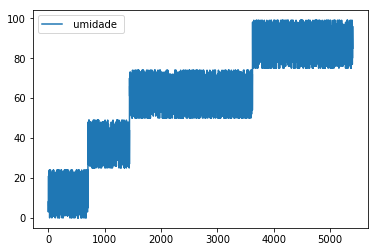

In [6]:
Image("tab2.png")


Figura 1 – Distribuição de frequência dos níveis  nos pontos de monitoramento
A Figura 1 mostra a distribuição de frequência dos dados nos pontos de monitoramento. Para este projeto, estes pontos de monitoramento serão utilizados como dimensões, e cada sensor possui como características a quantidade de dados por cada ponto. 

A Tabela 2 mostra a distribuição de dados estatísticos onde podemos observar os níveis de média, min e máximo dos dados, totalizando os niveis de umidade de solo nas faixas de min e max um range de 0 a 99.000.


Tabela 02 – Estatísticas de monitoramento


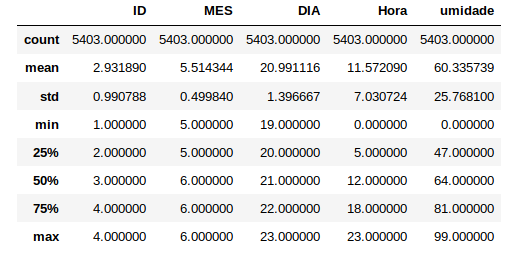

In [7]:
print "Tabela 02 – Estatísticas de monitoramento"
Image("tab3.png")

#### Algorítimos e Técnicas

K-NN –  K Nearest Neighbors(Algoritmo do vizinho mais próximo) 

É um algoritmo simples de aprendizado de máquina que categoriza uma entrada usando seus k vizinhos mais próximos.
Os vizinhos k-nearest, possuem várias propriedades que o diferenciam de outros algoritmos de aprendizado de máquina. Primeiro, kNN é não-paramétrico , o que significa que não faz nenhuma suposição sobre a distribuição de probabilidade da entrada. Isso é útil para aplicações com propriedades de entrada que são desconhecidas e, portanto, tornam o k-NN mais robusto do que os algoritmos paramétricos. O contraste é que algoritmos paramétricos de aprendizado de máquina tendem a produzir menos erros do que os não-paramétricos, já que levar em conta as probabilidades de entrada pode influenciar a tomada de decisão.
Além disso, kNN é um tipo de aprendizagem preguiçosa , que é um método de aprendizagem que generaliza os dados na fase de testes , e não durante a fase de treinamento . Isso é contrastado com o aprendizado rápido , que generaliza os dados na fase de treinamento, e não na fase de testes. Um benefício do aprendizado preguiçoso é que ele pode se adaptar rapidamente às mudanças, já que não está esperando um determinado conjunto de dados generalizado. No entanto, uma grande desvantagem é que uma quantidade enorme de computação ocorre durante o teste (uso real), em vez de pré-cálculo durante o treinamento.


#### III. Metodologia

Pré-processamento de dados
    As tabelas de dados carregadas no projeto estão arquivos .csv, estes arquivos são carregados em data frame, como exemplificado anteriormente nas Tabelas 01, 02 e 03.
    O data frame possuem em suas linhas a contagem dos niveis de umidade de cada sensor por cada area de atuação;
    Para cada leitura são seguidos os seguintes passos:
É criado uma variavel X para pegar dados de treino
É criada uma variavel y para cada dados de test

Não foram utilizadas técnicas para excluir outliers, pois esse projeto trata justamente de encontrar padrões que divergem do comportamento comum, portanto os outliers podem estar em os alvos do projeto.


Implementação


KNN
O data frame que contém os dados dos sensores em geral é denominado “df” de dataframe. Como “df” possui 5 características, será utilizado o agrupamento para descobrir qual vizinho se comunica com os vizinhos mais proxumos e passa a grupar os dados em 4 grupos.

#### Implementação
#### KNN
O data frame que contém os dados dos sensores em geral é denominado “df” de dataframe. Como “df” possui 5 características, será utilizado o agrupamento para descobrir qual vizinho se comunica com os vizinhos mais proxumos e passa a grupar os dados em 4 grupos.
    
Inicialmente é aplicado aos dados um KNN-Classifer com 4 componentes principais, após o treino e test, é feita a predição dos dados

---

### Comunicação com os IoTs

#### Topologia 

#####  Topologia de estrela  
Aqui vc deve criar um desenho de como vai ficar a topologia da rede 
explicar como cada componente deve ficar

#### Protocolo

MQTT é um protocolo comumnete usado na industria de coleta de dados 
e aplicado dentro de sistemas como scala, é foi desenvolvido 
pela ibm, para comunicação entre mainframes, por ser de facil
implementação é um protocolo que é extremamente facil de 
implementar e otimizar.

O MQTT opera usando conceito de topicos para envio e recebimento
de mensagens, usando um conceito de topologia de rede muito semelhante 
a rede estrela, onde temos um broker(server), e varios 
iot conectados e enviando e recebendo mensagens, sendo 
para publish(enviar) e subcribe(receber).





* PROCURAR FOTO NODEMCU


#### Embarcado

O embarcado utilizado neste projeto foi o NODEMCU(esp8266), 
um ele se torna muito util em coleta de dados de campo, foi utilizado 4 nodemcu's durante o projeto
ele possui portas de I/O e possui um chip esp especifico para 
trabalhar com redes sem fio, por operar em modelo tcp/ip embarcado, o node tem bibliotecas que falam com mqtt

Em uma rede local, é possivel fazer coleta de dados do node, 
usando protocolo de baixa latencia para otimização de coleta,
por ser barato e facil de encontrar no mercado, foi a melhor 
opção para esse tipo de problema.

#### Sensor

[ DEBORA FAZ ] Sensor de Umidade de solo, este sensor tem 




### IV. Resultados
## Avaliação e validação de modelos
### Justificativa
O segmento 18 alcançou um score de 11,3441. Este segmento possui 71,75% dos veículos com restrição. Analisando a segmentação do conjunto principal, o segmento 18 representa 31,33% do total.
O sistema foi capaz de encontrar um segmento que contém 31,33% do total de veículos, porém ao analisar os veículos com restrição, este segmento possui 71,75% do total de veículos com restrição. 
Ainda há de considerar que o conjunto de veículos com restrição de validação possui 2.068 veículos, o conjunto principal de dados possui 618.757, portanto, os veículos com restrição representam 0,33% do total. No segmento destacado, a taxa de veículos com restrição foi de 0,76%, ou seja, ao selecionar um veículo deste segmento, a chance de encontrar um veículo com restrição é 2,3 vezes maior do que se fosse selecionado um veículo da população geral.
### V. Conclusão
# Reflexão

### VI. Referências

[1] https://pt.wikipedia.org/wiki/An%C3%A1lise_de_componentes_principais#Algoritmos_iterativos

[2] http://scikit-learn.org/stable/modules/clustering.html#k-means

[3] http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html




### MELHORIAS 
##### Pegar novos dados 

* Dados meteriologicos (API_OPEN_MAPS/ GOOGLE DATA)
* Cadastrar tipos de plantas e nivels especificos 
* Cadastrar quantidade de vezes de rega
* Cadastrar tempo de rega para cada planta
* Cadastrar região do terreno
* Dados de fauna por região mapeada
* Dados dos tipos de praga e classificação dos tipos mais comuns para cada tipo de plantação
